---
### 1. 物体冷却的数学模型
牛顿冷却定律
$$
\frac{{\rm d}u}{{\rm d}t}=-k\left(u-T_0\right)
$$

In [1]:
import numpy as np
import sympy as sp
sp.init_printing(use_latex=True)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [2]:
t = sp.symbols('t')
k = sp.symbols('k', real=True)
u = sp.Function('u')
eq = sp.Eq(u(t).diff(t), -k*(u(t)-20))   # 牛顿冷却定律
utk = sp.dsolve(eq, u(t), ics={u(0):100}).rhs
k_sol = sp.solve(utk.subs(t, 20)-60, k)[0].simplify()
ut = utk.subs(k, k_sol)
ut

In [3]:
t1 = sp.solve(ut-30, t)[0]
t1

### 2. 目标跟踪问题

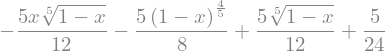

In [4]:
v0 = sp.symbols('v0', nonneg=True)
x = sp.symbols('x', nonneg=True)
y = sp.Function('y')
expo = sp.Rational(1, 5)
eq = sp.Eq(sp.Derivative(y(x), x), ((1-x)**(-expo)-(1-x)**(expo))/2)
yx = sp.dsolve(eq, y(x), ics={y(0):0}).simplify().rhs
yx

In [5]:
y0 = yx.subs(x, 1)
y0

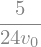

In [6]:
y0 / v0